Machine Learning Lab 2
======
### Альромхин Джорж, гр.858301

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

#### 1. Load Data

In [26]:
data_row1 = np.genfromtxt('../Data/lab2/ex2data1.txt', delimiter=',')
data1 = pd.DataFrame(data_row1, columns=list(['grade1', 'grade2', 'accepted']))
data1.head()

,grade1,grade2,accepted
0,34.623660,78.024693,0.0
1,30.286711,43.894998,0.0
2,35.847409,72.902198,0.0
3,60.182599,86.308552,1.0
4,79.032736,75.344376,1.0


#### 2. Build a graph where the axes are postponed grades in subjects, and the points are indicated by two different markers depending on whether the student entered the University or not.

<Figure size 432x288 with 0 Axes>

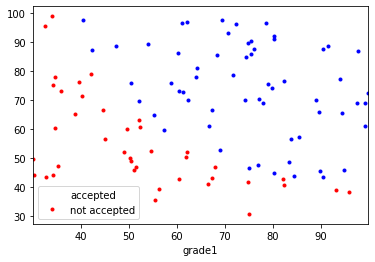

In [29]:
plt.figure()
ax = data1.loc[data1.accepted == 1].plot(x='grade1', y='grade2', style=['b.'], label='accepted')
data1.loc[data1.accepted == 0].plot(x='grade1', y='grade2', style=['r.'], label='not accepted', ax=ax)
plt.show()

#### 3.Implement loss functions J(θ) and gradient descent for logistic regression using vectorization.


In [30]:
def sigmoid(X):
   return 1/(1+np.exp(-X))

In [31]:
def cost_function(theta, X, y):
    m = y.size
    h = sigmoid(X @ theta)
    J = (-1 / m) * ((y.T @ np.log(h)) + ((1-y).T @ np.log(1-h)))
    error = h - y
    grad = (1 / m) * (X.T @ error)
    return J, grad

In [67]:
m, n = data1.shape
X = data1[['grade1', 'grade2']]
X.insert(0, 'theta_0', 1)
X = X.to_numpy()
y = data1['accepted']
initial_theta = np.zeros(n)
cost, grad = cost_function(initial_theta, X, y)
print('cost at initial theta (zeros):',cost)
print('gradient at initial theta (zeros):',grad)

cost at initial theta (zeros): 0.6931471805599452
gradient at initial theta (zeros): [ -0.1        -12.00921659 -11.26284221]


#### 4.Implement other optimization methods (at least 2) for the implemented value function (e.g. Nelder-Mead Method, Broyden — Fletcher — Goldfarb — Shanno Algorithm, genetic methods, etc.). It is allowed to use library implementations of optimization methods (for example, from the scipy library).

In [70]:
def cost_optimize(theta, X, y):
    cost, _ = cost_function(theta, X, y)
    return cost

def gradient_optimize(theta, X, y):
    _, grad = cost_function(theta, X, y)
    return grad

def optimize(func, gradient, X, y, method):
    initial_theta = np.zeros(n)
    
    result = opt.minimize(fun=func, x0=initial_theta, args=(X, y), method=method, jac=gradient)
    theta = result.x
    cost = func(theta, X, y)
    
    print(f'theta:\t{theta.ravel()}\ncost:\t{cost}')
    return result


#### Optimization using gradient information in a truncated Newton algorithm

In [71]:
res = optimize(cost_optimize, gradient_optimize, X, y, 'TNC')
res

theta:	[-25.16131854   0.20623159   0.20147149]
cost:	0.20349770158947494


     fun: 0.20349770158947494
     jac: array([9.00038139e-09, 8.52696398e-08, 4.75764761e-07])
 message: 'Local minimum reached (|pg| ~= 0)'
    nfev: 36
     nit: 17
  status: 0
 success: True
       x: array([-25.16131854,   0.20623159,   0.20147149])

#### Unconstrained minimization of a function using the Newton-CG method

In [73]:
result = optimize(cost_optimize, gradient_optimize, X, y, 'Newton-CG')
result

theta:	[-25.16076473   0.20622705   0.20146712]
cost:	0.20349770163804756


     fun: 0.20349770163804756
     jac: array([-3.71475306e-06, -2.50437739e-04, -2.32431480e-04])
 message: 'Optimization terminated successfully.'
    nfev: 72
    nhev: 0
     nit: 29
    njev: 258
  status: 0
 success: True
       x: array([-25.16076473,   0.20622705,   0.20146712])

#### Implement the function of predicting the probability of a student's admission depending on the values of the exam scores.

In [74]:
def predict(theta, X):
    predict = sigmoid(np.dot(X, theta))
    return predict > 0.5

theta = result.x
prob = sigmoid(np.array([1, 45, 85]) @ theta)
print(f'For a student with scores 45 and 85, we predict an admission probability of {prob}')

For a student with scores 45 and 85, we predict an admission probability of 0.7762868655447364


In [75]:
p = predict(np.array(theta), X)
print('Train Accuracy: %f' % ((y[p == y].size / float(y.size)) * 100.0))

Train Accuracy: 89.000000


#### Build a dividing line obtained as a result of training the model. Align the line with the graph from point 2.


<Figure size 432x288 with 0 Axes>

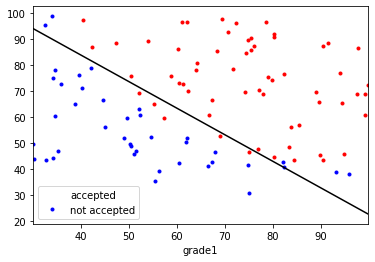

In [77]:
plt.figure()
ax = data1.loc[data1.accepted == 1].plot(x='grade1', y='grade2', style=['r.'], label='accepted')
data1.loc[data1.accepted == 0].plot(x='grade1', y='grade2', style=['b.'], label='not accepted', ax=ax)
slope = -(theta[1] / theta[2])
intercept = -(theta[0] / theta[2])
x_vals = np.array(ax.get_xlim())
y_vals = intercept + (slope * x_vals)
plt.plot(x_vals, y_vals, c="k");
plt.show()

### Laod data2

In [79]:
data_row2 = np.genfromtxt('../Data/lab2/ex2data2.txt', delimiter=',')
data2 = pd.DataFrame(data_row2, columns=list(['test1', 'test2', 'accepted']))
data2.head()

,test1,test2,accepted
0,0.051267,0.69956,1.0
1,-0.092742,0.68494,1.0
2,-0.213710,0.69225,1.0
3,-0.375000,0.50219,1.0
4,-0.513250,0.46564,1.0


### Build a graph where the test results are deferred along the axes, and the points are indicated by two different markers, depending on whether the product has passed the control or not.

<Figure size 432x288 with 0 Axes>

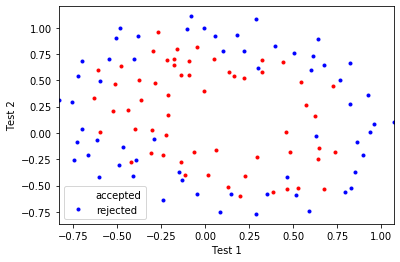

In [80]:
plt.figure()
ax = data2.loc[data2.accepted == 1].plot(x='test1', y='test2', style=['r.'], label='accepted')
data2.loc[data2.accepted == 0].plot(x='test1', y='test2', style=['b.'], label='rejected', ax=ax)
ax.set_ylabel('Test 2')
ax.set_xlabel('Test 1')
plt.show()

### Construct all possible combinations of features x1 (the result of the first test) and x2 (the result of the second test) in which the degree of the polynomial does not exceed 6, i.e. 1, x1, x2, x12, x1x2, x22,..., x1x25, x26 (28 combinations in total).

In [85]:
def map_feature(x1, x2):
    '''
    Maps the two input features to quadratic features.
    Returns a new feature array with more features, comprising of
    X1, X2, X1 ** 2, X2 ** 2, X1*X2, X1*X2 ** 2, etc...
    Inputs X1, X2 must be the same size
    '''
    x1.shape = (x1.size, 1)
    x2.shape = (x2.size, 1)
    degree = 6
    out = np.ones(shape=(x1[:, 0].size, 1))

    m, n = out.shape

    for i in range(1, degree + 1):
        for j in range(i + 1):
            r = (x1 ** (i - j)) * (x2 ** j)
            out = np.append(out, r, axis=1)

    return out

mapped = map_feature(data2['test1'].to_numpy(), data2['test2'].to_numpy())

### Implement L2 regularization for logistic regression and train it on an extended feature set by gradient descent.


In [113]:
def cost_function_reg(theta, X, y, l):
    '''Compute the cost and partial derivatives as grads
    '''

    h = sigmoid(X.dot(theta))

    thetaR = theta[1:, 0]

    J = (-1.0 / m) * ((y.T @ np.log(h)) + ((1 - y.T) @ np.log(1.0 - h))) + (l / (2.0 * m)) * (thetaR.T @ thetaR)

    y.shape = h.shape
    delta = h - y
    sumdelta = delta.T @ X[:, 1]
    grad1 = (1.0 / m) * sumdelta

    XR = X[:, 1:X.shape[1]]
    sumdelta = delta.T @ XR

    grad = (1.0 / m) * (sumdelta + l * thetaR)

    out = np.zeros(shape=(grad.shape[0], grad.shape[1] + 1))

    out[:, 0] = grad1
    out[:, 1:] = grad

    return J.flatten(), out.T.flatten()

def gradient_descent(X, y, theta, l, alpha, num_iters):
    m = y.shape[0]  # Size of training set
    j_history = []
    for i in range(0, num_iters):
        cost, grad = cost_function_reg(theta, X, y, l)
        grad.shape = theta.shape
        theta -= alpha * grad
        j_history.append(cost)

    return theta, j_history

m, n = data2.shape
y = data2['accepted'].to_numpy()
y.shape = (m, 1)
initial_theta = np.zeros(shape=(mapped.shape[1], 1))
#Set regularization parameter lambda to 1
l = 1
gd_theta, costs = gradient_descent(mapped, y, initial_theta, l, 0.2, 400)



### Implement other optimization methods.


In [114]:
def cost_decorator(theta, X, y):
    theta.shape = (mapped.shape[1], 1)
    cost, _ = cost_function_reg(theta, X, y, l)
    theta.shape = (mapped.shape[1],)
    return cost


def gradient_decorator(theta, X, y):
    theta.shape = (mapped.shape[1], 1)
    _, grad = cost_function_reg(theta, X, y, l)
    theta.shape = (mapped.shape[1],)
    return grad

initial_theta = np.zeros((mapped.shape[1], ))
result = opt.minimize(fun=cost_decorator, x0=initial_theta, args=(mapped, y), method='BFGS', jac=gradient_decorator)
bfgs_theta = result.x

### Implement the function of predicting the probability of passing the control of the product depending on the test results.


In [115]:
p = predict(np.array(gd_theta), mapped)
print('Train Accuracy with gradient descent: %f' % ((y[p == y].size / float(y.size)) * 100.0))
p = predict(np.array(bfgs_theta), mapped)
p.shape = y.shape
print('Train Accuracy using the BFGS algorithm: %f' % ((y[p == y].size / float(y.size)) * 100.0))

Train Accuracy with gradient descent: 80.508475
Train Accuracy using the BFGS algorithm: 83.898305


#### Try different values of the regularization parameter λ. How does the choice of this value affect the appearance of the separating curve? Give the answer in the form of graphs.


<Figure size 432x288 with 0 Axes>

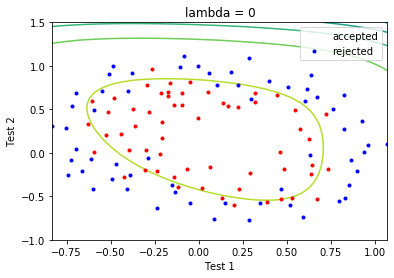

In [117]:
def train_with_plot(l):
    
    def plot(theta):
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)
        z = np.zeros(shape=(len(u), len(v)))
        for i in range(len(u)):
            for j in range(len(v)):
                z[i, j] = (map_feature(np.array(u[i]), np.array(v[j])).dot(np.array(theta)))

        z = z.T
        plt.figure()
        ax = data2.loc[data2.accepted == 1].plot(x='test1', y='test2', style=['r.'], label='accepted')
        data2.loc[data2.accepted == 0].plot(x='test1', y='test2', style=['b.'], label='rejected', ax=ax)
        ax.contour(u, v, z)
        ax.set_ylabel('Test 2')
        ax.set_xlabel('Test 1')
        plt.title(f'lambda = {l}')
        plt.show()
        
    initial_theta = np.zeros(shape=(mapped.shape[1], 1))
    theta, _ = gradient_descent(mapped, y, initial_theta, l, 0.2, 1000)
    data2 = pd.DataFrame(data_row2, columns=list(['test1', 'test2', 'accepted']))

    plot(theta)
    
train_with_plot(0)
    

<Figure size 432x288 with 0 Axes>

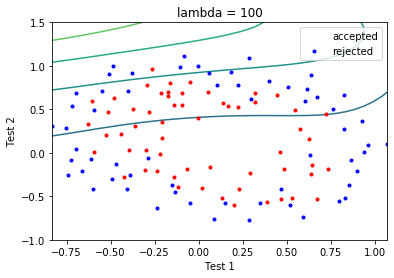

In [118]:
train_with_plot(100)

### load data3

In [106]:
import scipy.io

data3 = scipy.io.loadmat('../Data/lab2/ex2data3.mat')
x = np.array(data3['X'])
y = np.squeeze(data3['y'])
np.place(y, y == 10, 0)
n = x.shape[1]
m = x.shape[0]
labels_count = 10

#### Visualize multiple random images from a dataset. The visualization must contain each digit at least once.

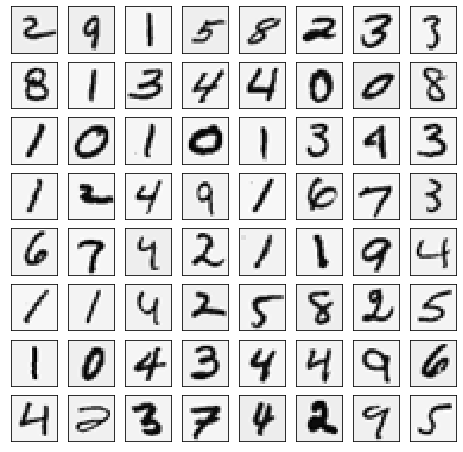

In [120]:
import matplotlib.image as mpimg

subplots = 64
draw_seed = np.random.randint(low=0, high=x.shape[0], size=subplots)
draw_rows = x[draw_seed]
fig, ax = plt.subplots(8, 8, figsize=(8, 8))
for i, axi in enumerate(ax.flat):
    data = np.reshape(draw_rows[i], (20, 20), order='F')
    axi.imshow(data, cmap='binary')
    axi.set(xticks=[], yticks=[])

plt.show()

#### Implement a binary classifier using logistic regression using vectorization (loss function and gradient descent).
#### Add L2 regularization to the model.
#### Implement a one-versus-all multi-class classification.

#### Implement the class prediction function on the image using trained classifiers.

In [ ]:
X = np.ones(shape=(x.shape[0], x.shape[1] + 1))
X[:, 1:] = x
classifiers = np.zeros(shape=(labels_count, n + 1))
for i in range(0, labels_count):
    label = (y == i).astype(int)
    initial_theta = np.zeros(shape=(X.shape[1], 1))
    theta, costs = gradient_descent(X, label, initial_theta, 0.4, 2.8, 10000)
    classifiers[i, :] = np.squeeze(theta)

In [ ]:
def predict_class(input, classifiers):
    class_probs = sigmoid(input @ classifiers.transpose())
    if len(class_probs.shape) == 1:
        class_probs.shape = (1, class_probs.shape[0])
    predictions = class_probs.argmax(axis=1)
    return predictions

#### The percentage of correct classifications in the training sample should be about 95%.


In [229]:
predictions = predict_class(X, classifiers)
print(f'Training accuracy: {str(100 * np.mean(predictions == y))}')

Training accuracy: 94.74000000000001
